<a href="https://colab.research.google.com/github/ucfilho/Biochemical_Engineering/blob/master/Class_jul_nov_2021/Reator_003_batelada_alimentada_isotermico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
t0=0;tf=10;
Xreator=10;Sreator=10;Preator=10;Flow=400000;
MI_m=0.4;Ks=2;Yxs=0.5;Ypx=0.8;
X0=0;P0=0;S0=160;Vol=600000;
Vol_Ini=Vol*1/10;# cheio com 10%
x0=[Sreator,Xreator,Preator,Vol_Ini];


In [3]:

def f(Var,t):
  D=Flow/Vol;S=Var[0];X=Var[1];P=Var[2];Volume=Var[3];
  Ds=0 # saida do reator
  MI=MI_m*S/(S+Ks) 
  if(Volume > Vol):
    D=0 
  Cdot = np.zeros(4)
  Cdot[0]=(-1)*MI*X/Yxs+D*S0-D*S # substrato
  Cdot[1]= MI*X+D*X0-D*X # celulas
  Cdot[2]= MI*X*Ypx+D*P0-D*P # produto
  Cdot[3]= Flow # volume
  if(Volume > Vol):
    Cdot[3]=0
  return Cdot


In [4]:
t = np.linspace(t0, tf, 101)
x = odeint(f, x0, t )

Text(0, 0.5, 'S-g/L')

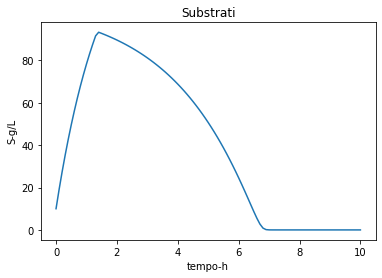

In [5]:
plt.plot(t,x[:,0])
plt.title('Substrati')
plt.xlabel('tempo-h')
plt.ylabel('S-g/L')

Text(0, 0.5, 'X-g/L')

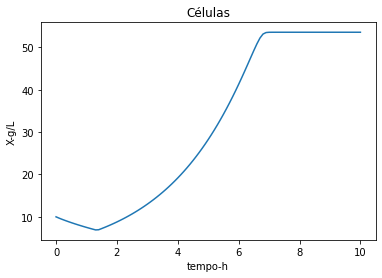

In [6]:
plt.plot(t,x[:,1])
plt.title('Células')
plt.xlabel('tempo-h')
plt.ylabel('X-g/L')

Text(0, 0.5, 'P-g/L')

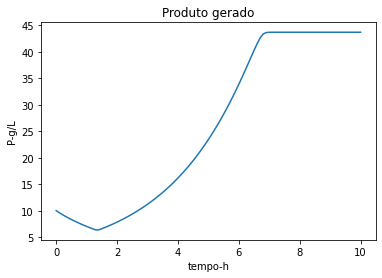

In [7]:
plt.plot(t,x[:,2])
plt.title('Produto gerado')
plt.xlabel('tempo-h')
plt.ylabel('P-g/L')

Text(0, 0.5, 'Volume-m3')

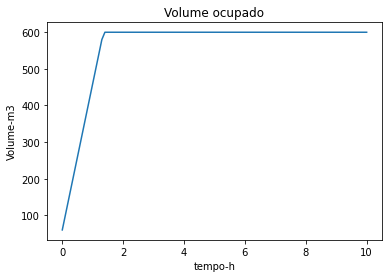

In [8]:
plt.plot(t,x[:,3]/1000)
plt.title('Volume ocupado')
plt.xlabel('tempo-h')
plt.ylabel('Volume-m3')